In [4]:
# Step 1: Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import pickle
import openpyxl
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Step 2: Load the dataset
file_path = 'PCOS_data_without_infertility.xlsx'
data = pd.read_excel(file_path)

In [6]:
# Step 3: Data Cleaning and Preprocessing
# Drop irrelevant columns
columns_to_drop = ['Sl. No', 'Patient File No.', 'Unnamed: 44']
data_cleaned = data.drop(columns=columns_to_drop, axis=1)

# Convert 'object' type columns to numeric (if possible)
object_cols = data_cleaned.select_dtypes(include=['object']).columns
for col in object_cols:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Fill missing values
numeric_cols = data_cleaned.select_dtypes(include=['float64', 'int64']).columns
data_cleaned[numeric_cols] = data_cleaned[numeric_cols].fillna(data_cleaned[numeric_cols].mean())

# Features and target variable
features = [
    'Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'FSH(mIU/mL)', 'LH(mIU/mL)',
    'FSH/LH', 'PRL(ng/mL)', 'TSH (mIU/L)', 'Vit D3 (ng/mL)',
    'Waist:Hip Ratio','Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)',
    'Endometrium (mm)'
]

In [7]:
# Target variable (PCOD prediction)
target = 'PCOS (Y/N)'

In [8]:
# Step 5: Separate features and target
X = data_cleaned[features]
y = data_cleaned[target]

# Check for any NaN values in the target variable
if y.isnull().sum() > 0:
    print(f"Number of missing values in target variable: {y.isnull().sum()}")
    # Fill missing target values with the mode (most common value)
   
    y.fillna(y.mode()[0], inplace=True)


In [9]:
# Step 6: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 7: Standardize the feature values
# Initialize the StandardScaler
scaler = StandardScaler()

# Update numeric_cols to contain only columns that are in X_train
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Apply scaling only to numeric columns in features
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])


In [11]:
# Step 8: Build and train the model (Random Forest Classifier)
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [12]:
# Step 9: Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
# Step 10: Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')
print('Classification Report:')
print(report)

Accuracy: 77.06%
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        77
           1       0.62      0.56      0.59        32

    accuracy                           0.77       109
   macro avg       0.72      0.71      0.72       109
weighted avg       0.77      0.77      0.77       109



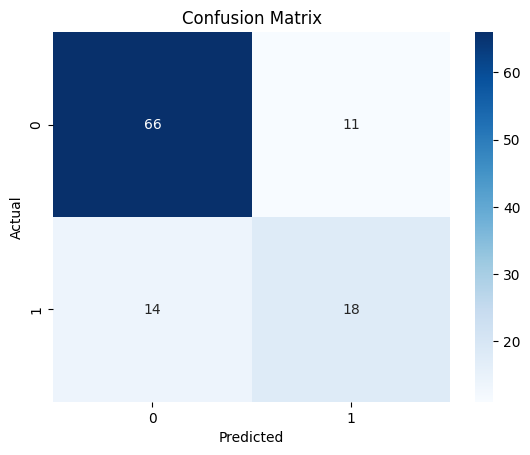

In [14]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [15]:
# Step 11: Feature Importance (Optional - for Random Forest)
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]


In [16]:
import pickle 
pickle.dump(model, open(r'iteration_1.pickle', 'wb'))

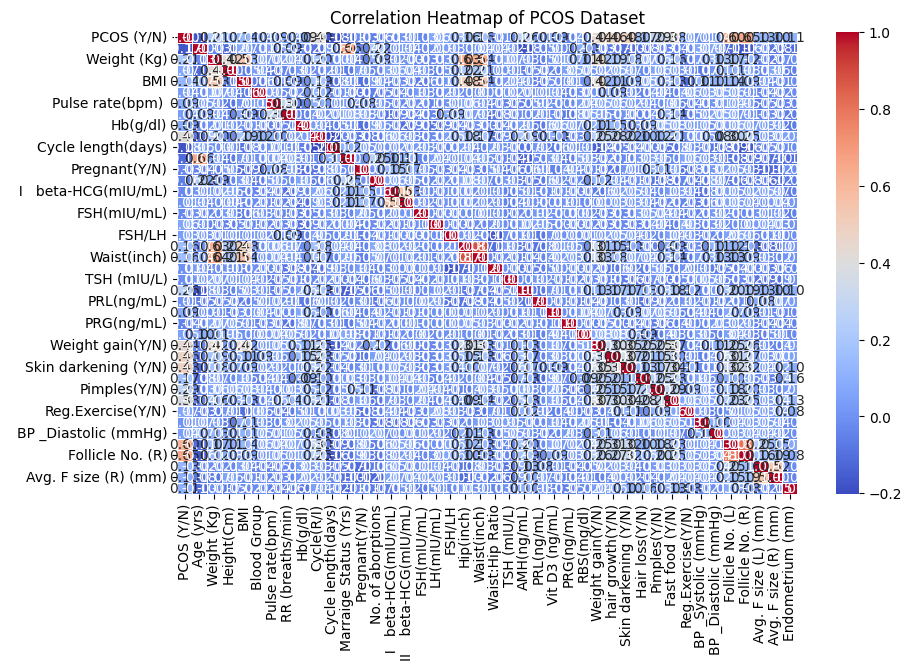

In [17]:


corr_matrix = data_cleaned.corr()  # Calculate correlation matrix

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of PCOS Dataset')
plt.show()
